<a href="https://colab.research.google.com/github/kangyujin0/OpenCV/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
A = np.array([[1,2,3], [4,5,6]])
print(A)

[[1 2 3]
 [4 5 6]]


In [ ]:
!pip list

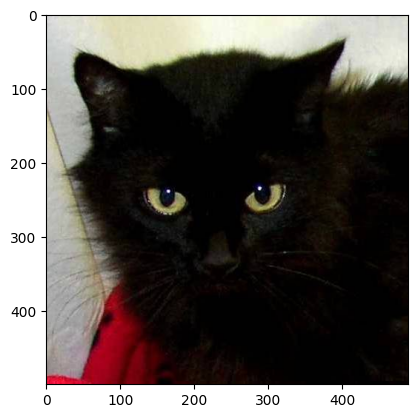

(500, 490, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

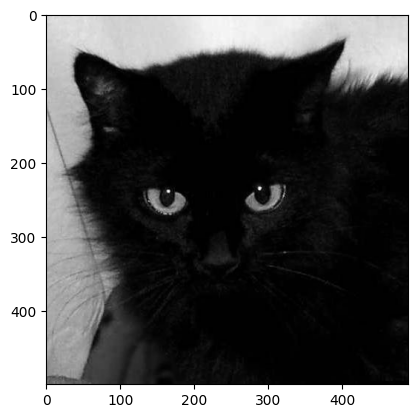

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

color_img = Image.open('/content/drive/MyDrive/OpenCV/cat_dog_small.zip (Unzipped Files)/test/cats/cat.1500.jpg') #.convert('L') # 이미지 경로=./c:\Users\EMBEDDED\Desktop\new 현재 작업 폴더에 이미지 저장
plt.imshow(color_img)
plt.show()

# 이미지 객체 -> numpy 행렬
color_pixel=np.array(color_img)
print(color_pixel.shape)                           # color_pixel가 행렬로 표현되면 shape가능 print=(426, 640, 3)채널 수

gray_pixe1=color_pixel.copy()                      # color 지정, RGB는 8bit, gray(0~255)밝기

# RGB의 평균값을 넣어준다(데이터 처리에서와 달리 평균값 필요)
for y in range(gray_pixe1.shape[0]):               # for~in문
    for x in range(gray_pixe1.shape[1]):
        gray_pixe1[y,x] = np.mean(gray_pixe1[y,x]) # mean=평균값

plt.imshow(gray_pixe1)                             # gray color 표현
plt.show

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0xffffffff
cpu MHz		: 2000.144
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmi

Found 2004 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)
[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1.]


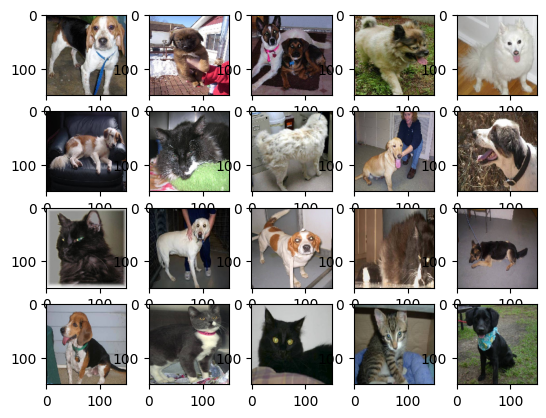

In [ ]:
# ImageDataGenerator 데이터 변형(증강)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 경로 지정 리눅스형태로 ./위치/파일명
train_dir='/content/drive/MyDrive/OpenCV/cat_dog_small.zip (Unzipped Files)/train'
validation_dir='/content/drive/MyDrive/OpenCV/cat_dog_small.zip (Unzipped Files)/validation'

# 생성
train_datagen=ImageDataGenerator(rescale=1/255) # 0~1까지 scale정규화
validation_datagen=ImageDataGenerator(rescale=1/255)

# 설정
train_generator=train_datagen.flow_from_directory(
    train_dir,                  # 위치
    classes=['cats', 'dogs'],   # 타겟, 레이블
    target_size=(150, 150),     # 사이즈 전처리
    batch_size=20,
    class_mode='binary'
)

validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    classes=['cats', 'dogs'],
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# generator 동작확인
# 한번에 20개 이미지 가져와서 출력
fig=plt.figure()
axs=[]

for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))

for data_batch, label_batch in train_generator:
    print(data_batch.shape)

    for idx, img_data in enumerate(data_batch):
        axs[idx].imshow(img_data)

    print(label_batch.shape)
    print(label_batch)

    break


In [ ]:
from tensorflow.keras.applications import VGG16

model_base=VGG16(
    weights='imagenet', # 외부 imagenet에서 이미지를 받는다
    include_top=False, # filter만 가져옴
    input_shape=(150,150,3)
)

model_base.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
# train_generator 사용 위해 상단 코드 실행 후 작성
# VGG16 -> 전이학습
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# 1. 모델생성
model=Sequential()

# 2. VGG16으로 대체
model_base=VGG16(
    weights='imagenet',     # 외부 imagenet에서 이미지를 받는다
    include_top=False,      # filter만 가져옴
    input_shape=(150,150,3) # 3은 이미지의 채널(channel) 수, RGB색상 채널
)

# 3. 특성 추출
model_base.trainable=False  # 이미 완성된 필터만 사용, train(변경)하지 않는다

model.add(model_base)

model.add(Flatten())

model.add(Dense(
    units=1,
    activation='sigmoid'
))
model.summary()             # 모델의 구조 및 파라미터에 대한 정보를 제공

# 모델 설정
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['acc']
)

# 학습
model.fit(
    train_generator,
    steps_per_epoch=100, #2000/100=100
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50, # 1000/20=50
    verbose=1
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1)                 8193      
                                                                 
Total params: 14722881 (56.16 MB)
Trainable params: 8193 (32.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch 1/30
100/100 [==============================] - 959s 10s/step - loss: 0.6093 - acc: 0.6845 - val_loss: 0.5103 - val_acc: 0.7950
Epoch 2/30
100/100 [==============================] - 15s 147ms/step - loss: 0.4614 - acc: 0.8206 - val_loss: 0.4253 - val_acc: 0.8490
Epoch 3

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

#244x 244 사이즈로 리사이즈를 하고, 정규화를 해줍니다.
def format_image(image,label):
    image = tf.image.resize(image,(224,224))/255.0
    return image, label

#훈련, 검증, 테스트 세트로 나눕니다.
(raw_train, raw_validation, raw_test), metadata =tfds.load(
    'citrus_leaves',
    split=['train[:80%]','train[80%:90%]','train[90%:]'],
    with_info=True,
    as_supervised=True,
)

print(metadata)

num_examples = metadata.splits['train'].num_examples
num_classes = metadata.features['label'].num_classes


BATCH_SIZE = 32
train_batches = raw_train.shuffle(num_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)

validation_batches = raw_validation.map(format_image).batch(BATCH_SIZE).prefetch(1)

test_batches = raw_test.map(format_image).batch(1)

model = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/tf2-preview-feature-vector/versions/4",
                   input_shape = (224,224,3),
                   output_shape=[1280],
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss ='sparse_categorical_crossentropy',
    metrics =['accuracy']
)

hist = model.fit(
    train_batches,
    epochs = 5,
    validation_data = validation_batches
)

model.summary()

#학습된 모델 저장하기
CITRUS_LEAVES_SAVED_MODEL = "/content/drive/MyDrive/exp_saved_model"
tf.saved_model.save(model, CITRUS_LEAVES_SAVED_MODEL)

#tensoflow lite로 변환하기
converter = tf.lite.TFLiteConverter.from_saved_model(CITRUS_LEAVES_SAVED_MODEL)
tflite_model = converter.convert()
tflite_model_file = '/content/drive/MyDrive/converted_model.tflite'

#with open(…) as f 에서 f는 open(…)함수가 리턴한 file object.
with open(tflite_model_file, "wb") as f:
  f.write(tflite_model)


interpreter = tf.lite.Interpreter(model_content=tflite_model)
input_details = interpreter.get_input_details()[0]
print('input: ', input_details)
output_details = interpreter.get_output_details()[0]
print('output: ', output_details)

tfds.core.DatasetInfo(
    name='citrus_leaves',
    full_name='citrus_leaves/0.1.2',
    description="""
    The original citrus dataset contains 759 images of healthy and unhealthy citrus
    fruits and leaves. However, for now we only export 594 images of citrus leaves
    with the following labels: Black Spot, Canker, Greening, and Healthy. The
    exported images are in PNG format and have 256x256 pixels.
    
    NOTE: Leaf images with Melanose label were dropped due to very small count and
    other non-leaf images being present in the same directory.
    
    Dataset URL: https://data.mendeley.com/datasets/3f83gxmv57/2
    License: http://creativecommons.org/licenses/by/4.0
    """,
    homepage='https://data.mendeley.com/datasets/3f83gxmv57/2',
    data_dir='/root/tensorflow_datasets/citrus_leaves/0.1.2',
    file_format=tfrecord,
    download_size=63.87 MiB,
    dataset_size=37.89 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
   

In [ ]:
#추론 테스트
interpreter.allocate_tensors()
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

#테스트 배치 파일을 10개 씩 가져와서
predictions =[]
test_labels, test_imgs = [],[]
for img, label in test_batches.take(10):
    interpreter.set_tensor(input_index, img)
    interpreter.invoke()
    predictions.append(interpreter.get_tensor(output_index))
    test_labels.append(label.numpy()[0])
    test_imgs.append(img)

print("predictions:",predictions)
print("labels:",test_labels)

#예측 수 비교
score  = 0
for item in range(0,10):
    prediction = np.argmax(predictions[item])
    label = test_labels[item]
    if prediction == label:
        score = score +1


print("10개 중 맞은 예측 수: "+ str(score))

predictions: [array([[0.02884226, 0.9285421 , 0.03923444, 0.00338119]], dtype=float32), array([[0.7278787 , 0.09558216, 0.15790173, 0.01863742]], dtype=float32), array([[0.03873033, 0.8859114 , 0.0455581 , 0.02980014]], dtype=float32), array([[0.57374877, 0.03414113, 0.38061428, 0.01149582]], dtype=float32), array([[0.00144297, 0.99494815, 0.00219415, 0.00141477]], dtype=float32), array([[0.08702845, 0.22652894, 0.66177446, 0.02466812]], dtype=float32), array([[0.75923896, 0.07061332, 0.13656065, 0.03358711]], dtype=float32), array([[0.6124097 , 0.0110778 , 0.36044696, 0.01606558]], dtype=float32), array([[0.16287006, 0.04003614, 0.45147035, 0.34562343]], dtype=float32), array([[0.9184813 , 0.01465606, 0.06364514, 0.0032176 ]], dtype=float32)]
labels: [1, 0, 1, 0, 1, 2, 0, 2, 2, 0]
10개 중 맞은 예측 수: 9


In [ ]:
# 대표 샘플을 뽑아서, variable data 양자화
def representative_data_gen(): #모델의 양자화 (Quantization)를 위한 대표 데이터를 생성
  for input_value, _ in test_batches.take(100):
    yield [input_value] #대표 데이터를 생성, 모델 양자화에 사용

converter = tf.lite.TFLiteConverter.from_saved_model(CITRUS_LEAVES_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.DEFAULT] #모델에 기본적인 최적화를 적용
converter.representative_dataset = representative_data_gen

tflite_model_ffq = converter.convert()
tflite_model_file = '/content/drive/MyDrive/ffq_converted_model.tflite'
with open(tflite_model_file, "wb") as f:
  f.write(tflite_model_ffq)


interpreter = tf.lite.Interpreter(model_content=tflite_model_ffq)
input_details = interpreter.get_input_details()[0]
print('input: ', input_details)
output_details = interpreter.get_output_details()[0]
print('output: ', output_details)


input:  {'name': 'serving_default_keras_layer_input:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
output:  {'name': 'StatefulPartitionedCall:0', 'index': 179, 'shape': array([1, 4], dtype=int32), 'shape_signature': array([-1,  4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
